This notebook creates the three-dimensional visualsations for the paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d

In [2]:
def plane_3d_surface_orth(x_orth,y_orth,z_orth,max_x=1,max_y=1,max_z=1): # defines a plane which intersects the origin based on an orthogonal vector
    if z_orth==0: # cheat when vector is in the x-y plane
            print("surface plotting methods do not support planes without a z_coordinarte everywhere, setting z_orth=10^-3 to approximate what you want")
            z_orth=10**-3
    x_coords=np.linspace(-max_x,max_x,200) # define range
    y_coords=np.linspace(-max_y,max_y,200) # define range
    z_coords=-(x_orth*np.outer(x_coords,np.ones(200))+y_orth*np.outer(np.ones(200),y_coords))/z_orth # dot product set to zero
    return (x_coords,y_coords,z_coords)

In [59]:
def parametric_orthogonal_circle(x_orth,y_orth,z_orth): # returns coordinates of a circle of unit vectors orthogonal to vector defined by x_orth, y_orth, z_orth
    orth_vec=np.array([x_orth,y_orth,z_orth])
    if not (x_orth==0 and y_orth==0):
        plane_z0=np.array([orth_vec[1]/np.sqrt(orth_vec[0]**2+orth_vec[1]**2),-orth_vec[0]/np.sqrt(orth_vec[0]**2+orth_vec[1]**2),0])  # point where circle intersects x-y plane
        orth_plane=np.cross(plane_z0,orth_vec) # orthogonal vector which also lies on circle
        orth_plane=orth_plane/np.sqrt(np.dot(orth_plane,orth_plane)) # normalise
        theta=np.linspace(0,2*np.pi,200)
        x_par=orth_plane[0]*np.sin(theta)+plane_z0[0]*np.cos(theta)
        y_par=orth_plane[1]*np.sin(theta)+plane_z0[1]*np.cos(theta)
        z_par=orth_plane[2]*np.sin(theta)+plane_z0[2]*np.cos(theta)
    else:
        theta=np.linspace(0,2*np.pi,200)
        x_par=np.sin(theta)
        y_par=np.cos(theta)
        z_par=np.zeros(len(theta))
    return(x_par,y_par,z_par)

In [247]:
def circle_segment_vec(x1,y1,z1,x2,y2,z2): # draws a circular segment between vectors
    theta=np.linspace(0,np.pi/2,200)
    xcoords=x1*np.cos(theta)+x2*np.sin(theta)
    ycoords=y1*np.cos(theta)+y2*np.sin(theta)
    zcoords=z1*np.cos(theta)+z2*np.sin(theta)
    for inorm in range(len(xcoords)):
        norm=np.sqrt(xcoords[inorm]**2+ycoords[inorm]**2+zcoords[inorm]**2)
        xcoords[inorm]=xcoords[inorm]/norm
        ycoords[inorm]=ycoords[inorm]/norm
        zcoords[inorm]=zcoords[inorm]/norm
    return(xcoords,ycoords,zcoords)

def coords_filled_between_vecs(x1,y1,z1,x2,y2,z2): # gives X, Y, Z coordinates to fill between vectors
    (x_seg,y_seg,z_seg)=circle_segment_vec(x1,y1,z1,x2,y2,z2) # create circle segment
    r=np.linspace(0,1,200)
    x_wedge=np.outer(r,x_seg)
    y_wedge=np.outer(r,y_seg)
    z_wedge=np.outer(r,z_seg)
    return(x_wedge,y_wedge,z_wedge)

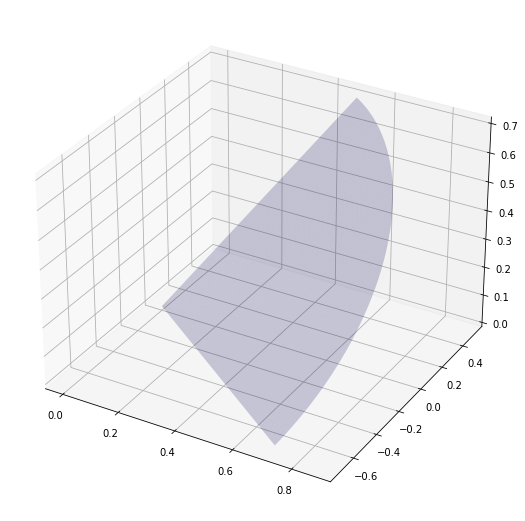

In [251]:
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 2, 1, projection='3d')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1/np.sqrt(2),-1/np.sqrt(2),0,1/2,1/2,1/np.sqrt(2))
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='b',alpha=0.2)

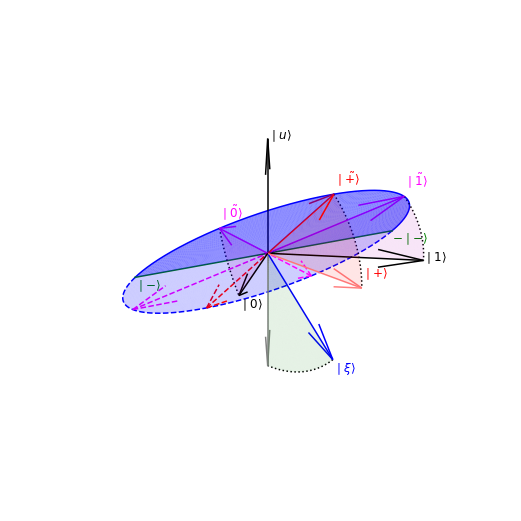

In [335]:
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 2, 1, projection='3d')
#(x_par,y_par,z_par)=parametric_orthogonal_circle(1/2,1/2,-1/np.sqrt(2))
#ax.plot(x_par,y_par,z_par)
#(x_coords,y_coords,z_coords)=plane_3d_surface_orth(1/np.sqrt(2),-1/np.sqrt(2),-1)
#ax.plot_surface(x_coords,y_coords,z_coords,alpha=0.5,color=[0.5,0,0.5])
#ax.quiver([0],[0],[0],[0.5],[0.5],[0.5])
#ax.quiver([0],[0],[0],[-1/np.sqrt(2)],[1/np.sqrt(2)],[0],color='green')
#ax.quiver([0],[0],[0],[1/np.sqrt(2)],[-1/np.sqrt(2)],[0],color='green')
(x_coords,y_coords,z_coords)=circle_segment_vec(1/np.sqrt(2),-1/np.sqrt(2),0,1/2,1/2,1/np.sqrt(2))
ax.plot(x_coords,y_coords,z_coords,'-b')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1/np.sqrt(2),-1/np.sqrt(2),0,1/2,1/2,1/np.sqrt(2))
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='b',alpha=0.5,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(-1/np.sqrt(2),1/np.sqrt(2),0,1/2,1/2,1/np.sqrt(2))
ax.plot(x_coords,y_coords,z_coords,'-b')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(-1/np.sqrt(2),1/np.sqrt(2),0,1/2,1/2,1/np.sqrt(2))
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='b',alpha=0.5,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(1/np.sqrt(2),-1/np.sqrt(2),0,-1/2,-1/2,-1/np.sqrt(2))
ax.plot(x_coords,y_coords,z_coords,'--b')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1/np.sqrt(2),-1/np.sqrt(2),0,-1/2,-1/2,-1/np.sqrt(2))
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='b',alpha=0.2,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(-1/np.sqrt(2),1/np.sqrt(2),0,-1/2,-1/2,-1/np.sqrt(2))
ax.plot(x_coords,y_coords,z_coords,'--b')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(-1/np.sqrt(2),1/np.sqrt(2),0,-1/2,-1/2,-1/np.sqrt(2))
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='b',alpha=0.2,shade=False)
plt.plot([1,-1]/np.sqrt(2),[-1,1]/np.sqrt(2),[0,0],color='green')
ax.text3D(1/np.sqrt(2),-1/np.sqrt(2),-0.1,r'$\mid {-} \rangle$',size='large',color='green')
ax.text3D(-1/np.sqrt(2),1/np.sqrt(2),-0.1,r'$-\mid {-} \rangle$',size='large',color='green')
ax.quiver([0],[0],[0],[1/(2*np.sqrt(2))-1/2],[1/(2*np.sqrt(2))+1/2],[1/2],color='magenta')
ax.quiver([0],[0],[0],[-1/(2*np.sqrt(2))+1/2],[-1/(2*np.sqrt(2))-1/2],[-1/2],color='magenta',linestyle='--')
(x_coords,y_coords,z_coords)=circle_segment_vec(1/(2*np.sqrt(2))-1/2,1/(2*np.sqrt(2))+1/2,1/2,0,1,0)
ax.plot(x_coords,y_coords,z_coords,':k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1/(2*np.sqrt(2))-1/2,1/(2*np.sqrt(2))+1/2,1/2,0,1,0)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='m',alpha=0.1,shade=False)
ax.quiver([0],[0],[0],[1/(2*np.sqrt(2))+1/2],[1/(2*np.sqrt(2))-1/2],[1/2],color='magenta')
ax.quiver([0],[0],[0],[-1/(2*np.sqrt(2))-1/2],[-1/(2*np.sqrt(2))+1/2],[-1/2],color='magenta',linestyle='--')
ax.text3D(1/(2*np.sqrt(2))+1/2,1/(2*np.sqrt(2))-1/2,1/2+0.1,r'$\mid \tilde{0} \rangle$',size='large',color='magenta')
(x_coords,y_coords,z_coords)=circle_segment_vec(1/(2*np.sqrt(2))+1/2,1/(2*np.sqrt(2))-1/2,1/2,1,0,0)
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1/(2*np.sqrt(2))+1/2,1/(2*np.sqrt(2))-1/2,1/2,1,0,0)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='m',alpha=0.1,shade=False)
ax.text3D(1/(2*np.sqrt(2))-1/2,1/(2*np.sqrt(2))+1/2,1/2+0.1,r'$\mid \tilde{1} \rangle$',size='large',color='magenta')
ax.plot(x_coords,y_coords,z_coords,':k')
ax.quiver([0],[0],[0],[1/np.sqrt(2)],[1/np.sqrt(2)],[0],color=[1,0.5,0.5])
ax.text3D(1/np.sqrt(2),1/np.sqrt(2),+0.1,r'$\mid {+} \rangle$',size='large',color='red')
ax.quiver([0],[0],[0],[1/2],[1/2],[1/np.sqrt(2)],color='red')
ax.quiver([0],[0],[0],[-1/2],[-1/2],[-1/np.sqrt(2)],color='red',linestyle='--')
ax.text3D(1/2,1/2,1/np.sqrt(2)+0.1,r'$\mid \tilde{+} \rangle$',size='large',color='red')
(x_coords,y_coords,z_coords)=circle_segment_vec(1/2,1/2,+1/np.sqrt(2),1/np.sqrt(2),1/np.sqrt(2),0)
ax.plot(x_coords,y_coords,z_coords,':k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1/2,1/2,+1/np.sqrt(2),1/np.sqrt(2),1/np.sqrt(2),0)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='r',alpha=0.1,shade=False)
ax.quiver([0],[0],[0],[0],[0],[1],color='black')
ax.text3D(0,0,1,r'$\mid u \rangle$',size='large',color='black')
ax.quiver([0],[0],[0],[0],[1],[0],color='black')
ax.text3D(0,1,0,r'$\mid 1 \rangle$',size='large',color='black')
ax.quiver([0],[0],[0],[1],[0],[0],color='black')
ax.text3D(1,0,-0.1,r'$\mid 0 \rangle$',size='large',color='black')
ax.quiver([0],[0],[0],[0],[0],[-1],color=[0.5,0.5,0.5])
ax.quiver([0],[0],[0],[1/2],[1/2],[-1/np.sqrt(2)],color='blue')
ax.text3D(1/2,1/2,-1/np.sqrt(2)-0.1,r'$\mid \xi \rangle$',size='large',color='blue')
(x_coords,y_coords,z_coords)=circle_segment_vec(1/2,1/2,-1/np.sqrt(2),0,0,-1)
ax.plot(x_coords,y_coords,z_coords,':k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1/2,1/2,-1/np.sqrt(2),0,0,-1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='g',alpha=0.1,shade=False)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlim(-1, 1)
ax.view_init(15,10,0)
plt.axis('off')
#plt.savefig('visualisation_3d.png',bbox_inches='tight')
plt.show()

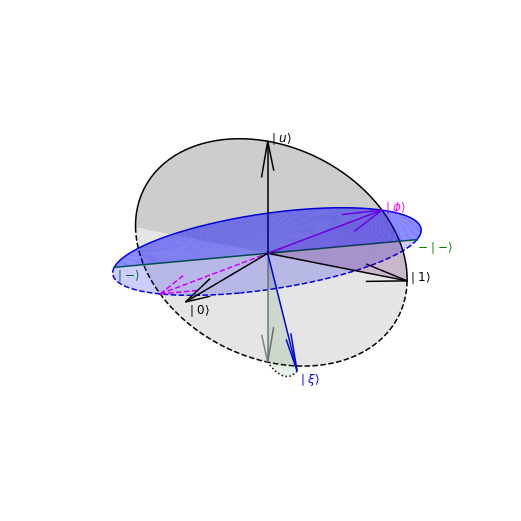

In [326]:
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 2, 1, projection='3d')
#(x_par,y_par,z_par)=parametric_orthogonal_circle(1/2,1/2,-1/np.sqrt(2))
#ax.plot(x_par,y_par,z_par)
#(x_coords,y_coords,z_coords)=plane_3d_surface_orth(1/np.sqrt(2),-1/np.sqrt(2),-1)
#ax.plot_surface(x_coords,y_coords,z_coords,alpha=0.5,color=[0.5,0,0.5])
#ax.quiver([0],[0],[0],[0.5],[0.5],[0.5])
#ax.quiver([0],[0],[0],[-1/np.sqrt(2)],[1/np.sqrt(2)],[0],color='green')
#ax.quiver([0],[0],[0],[1/np.sqrt(2)],[-1/np.sqrt(2)],[0],color='green')
(x_coords,y_coords,z_coords)=circle_segment_vec(1/np.sqrt(2),-1/np.sqrt(2),0,1/2,1/2,1/np.sqrt(2))
ax.plot(x_coords,y_coords,z_coords,'-b')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1/np.sqrt(2),-1/np.sqrt(2),0,1/2,1/2,1/np.sqrt(2))
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='b',alpha=0.5,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(-1/np.sqrt(2),1/np.sqrt(2),0,1/2,1/2,1/np.sqrt(2))
ax.plot(x_coords,y_coords,z_coords,'-b')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(-1/np.sqrt(2),1/np.sqrt(2),0,1/2,1/2,1/np.sqrt(2))
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='b',alpha=0.5,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(1/np.sqrt(2),-1/np.sqrt(2),0,-1/2,-1/2,-1/np.sqrt(2))
ax.plot(x_coords,y_coords,z_coords,'--b')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1/np.sqrt(2),-1/np.sqrt(2),0,-1/2,-1/2,-1/np.sqrt(2))
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='b',alpha=0.2,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(-1/np.sqrt(2),1/np.sqrt(2),0,-1/2,-1/2,-1/np.sqrt(2))
ax.plot(x_coords,y_coords,z_coords,'--b')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(-1/np.sqrt(2),1/np.sqrt(2),0,-1/2,-1/2,-1/np.sqrt(2))
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='b',alpha=0.2,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(0,1,0,0,0,1)
ax.plot(x_coords,y_coords,z_coords,'-k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(0,1,0,0,0,1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='k',alpha=0.2,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(0,-1,0,0,0,1)
ax.plot(x_coords,y_coords,z_coords,'-k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(0,-1,0,0,0,1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='k',alpha=0.2,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(0,-1,0,0,0,-1)
ax.plot(x_coords,y_coords,z_coords,'--k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(0,-1,0,0,0,-1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='k',alpha=0.1,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(0,1,0,0,0,-1)
ax.plot(x_coords,y_coords,z_coords,'--k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(0,1,0,0,0,-1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='k',alpha=0.1,shade=False)
plt.plot([1,-1]/np.sqrt(2),[-1,1]/np.sqrt(2),[0,0],color='green')
ax.text3D(1/np.sqrt(2),-1/np.sqrt(2),-0.1,r'$\mid {-} \rangle$',size='large',color='green')
ax.text3D(-1/np.sqrt(2),1/np.sqrt(2),-0.1,r'$-\mid {-} \rangle$',size='large',color='green')
#ax.quiver([0],[0],[0],[1/(2*np.sqrt(2))-1/2],[1/(2*np.sqrt(2))+1/2],[1/2],color='magenta')
#(x_coords,y_coords,z_coords)=circle_segment_vec(1/(2*np.sqrt(2))-1/2,1/(2*np.sqrt(2))+1/2,1/2,0,1,0)
#ax.plot(x_coords,y_coords,z_coords,':k')
#ax.quiver([0],[0],[0],[1/(2*np.sqrt(2))+1/2],[1/(2*np.sqrt(2))-1/2],[1/2],color='magenta')
#ax.text3D(1/(2*np.sqrt(2))+1/2,1/(2*np.sqrt(2))-1/2,1/2+0.1,r'$\mid \tilde{0} \rangle$',size='large',color='magenta')
#(x_coords,y_coords,z_coords)=circle_segment_vec(1/(2*np.sqrt(2))+1/2,1/(2*np.sqrt(2))-1/2,1/2,1,0,0)
#ax.text3D(1/(2*np.sqrt(2))-1/2,1/(2*np.sqrt(2))+1/2,1/2+0.1,r'$\mid \tilde{1} \rangle$',size='large',color='magenta')
#ax.plot(x_coords,y_coords,z_coords,':k')
n1=np.sqrt(3)
ax.text3D(0,np.sqrt(2)/n1,1/n1,r'$\mid \phi \rangle$',size='large',color='magenta')
ax.quiver([0],[0],[0],[0],[np.sqrt(2)/n1],[1/n1],color='magenta')
ax.quiver([0],[0],[0],[0],[-np.sqrt(2)/n1],[-1/n1],color='magenta',linestyle='--')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(0,np.sqrt(2)/n1,1/n1,0,1,0)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='m',alpha=0.1,shade=False)
#ax.quiver([0],[0],[0],[1/np.sqrt(2)],[1/np.sqrt(2)],[0],color=[1,0.5,0.5])
#ax.text3D(1/np.sqrt(2),1/np.sqrt(2),+0.1,r'$\mid {+} \rangle$',size='large',color='red')
#ax.quiver([0],[0],[0],[1/2],[1/2],[1/np.sqrt(2)],color='red')
#ax.text3D(1/2,1/2,1/np.sqrt(2)+0.1,r'$\mid \tilde{+} \rangle$',size='large',color='red')
#(x_coords,y_coords,z_coords)=circle_segment_vec(1/2,1/2,+1/np.sqrt(2),1/np.sqrt(2),1/np.sqrt(2),0)
#ax.plot(x_coords,y_coords,z_coords,':k')
ax.quiver([0],[0],[0],[0],[0],[1],color='black')
ax.text3D(0,0,1,r'$\mid u \rangle$',size='large',color='black')
ax.quiver([0],[0],[0],[0],[1],[0],color='black')
ax.text3D(0,1,0,r'$\mid 1 \rangle$',size='large',color='black')
ax.quiver([0],[0],[0],[1],[0],[0],color='black')
ax.text3D(1,0,-0.1,r'$\mid 0 \rangle$',size='large',color='black')
ax.quiver([0],[0],[0],[0],[0],[-1],color=[0.5,0.5,0.5])
ax.quiver([0],[0],[0],[1/2],[1/2],[-1/np.sqrt(2)],color='blue')
ax.text3D(1/2,1/2,-1/np.sqrt(2)-0.1,r'$\mid \xi \rangle$',size='large',color='blue')
(x_coords,y_coords,z_coords)=circle_segment_vec(1/2,1/2,-1/np.sqrt(2),0,0,-1)
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1/2,1/2,-1/np.sqrt(2),0,0,-1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='g',alpha=0.1,shade=False)
ax.plot(x_coords,y_coords,z_coords,':k')
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlim(-1, 1)
ax.view_init(20,30,0)
plt.axis('off')
#plt.savefig('visualisation_3d_forbid_0.png',bbox_inches='tight')
plt.show()

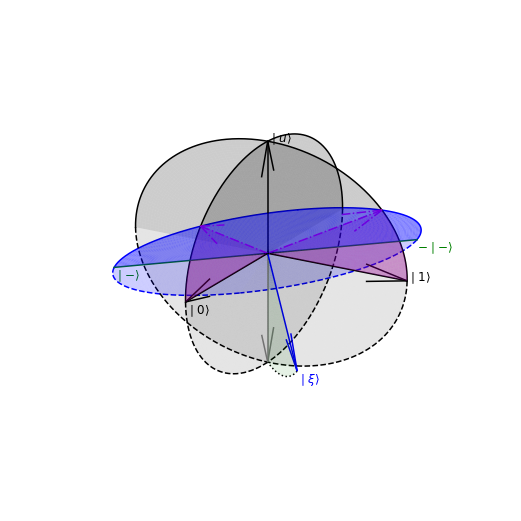

In [318]:
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 2, 1, projection='3d')
#(x_par,y_par,z_par)=parametric_orthogonal_circle(1/2,1/2,-1/np.sqrt(2))
#ax.plot(x_par,y_par,z_par)
#(x_coords,y_coords,z_coords)=plane_3d_surface_orth(1/np.sqrt(2),-1/np.sqrt(2),-1)
#ax.plot_surface(x_coords,y_coords,z_coords,alpha=0.5,color=[0.5,0,0.5])
#ax.quiver([0],[0],[0],[0.5],[0.5],[0.5])
#ax.quiver([0],[0],[0],[-1/np.sqrt(2)],[1/np.sqrt(2)],[0],color='green')
#ax.quiver([0],[0],[0],[1/np.sqrt(2)],[-1/np.sqrt(2)],[0],color='green')
(x_coords,y_coords,z_coords)=circle_segment_vec(1/np.sqrt(2),-1/np.sqrt(2),0,1/2,1/2,1/np.sqrt(2))
ax.plot(x_coords,y_coords,z_coords,'-b')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1/np.sqrt(2),-1/np.sqrt(2),0,1/2,1/2,1/np.sqrt(2))
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='b',alpha=0.5,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(-1/np.sqrt(2),1/np.sqrt(2),0,1/2,1/2,1/np.sqrt(2))
ax.plot(x_coords,y_coords,z_coords,'-b')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(-1/np.sqrt(2),1/np.sqrt(2),0,1/2,1/2,1/np.sqrt(2))
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='b',alpha=0.5,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(1/np.sqrt(2),-1/np.sqrt(2),0,-1/2,-1/2,-1/np.sqrt(2))
ax.plot(x_coords,y_coords,z_coords,'--b')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1/np.sqrt(2),-1/np.sqrt(2),0,-1/2,-1/2,-1/np.sqrt(2))
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='b',alpha=0.2,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(-1/np.sqrt(2),1/np.sqrt(2),0,-1/2,-1/2,-1/np.sqrt(2))
ax.plot(x_coords,y_coords,z_coords,'--b')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(-1/np.sqrt(2),1/np.sqrt(2),0,-1/2,-1/2,-1/np.sqrt(2))
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='b',alpha=0.2,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(0,1,0,0,0,1)
ax.plot(x_coords,y_coords,z_coords,'-k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(0,1,0,0,0,1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='k',alpha=0.2,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(0,-1,0,0,0,1)
ax.plot(x_coords,y_coords,z_coords,'-k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(0,-1,0,0,0,1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='k',alpha=0.2,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(0,-1,0,0,0,-1)
ax.plot(x_coords,y_coords,z_coords,'--k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(0,-1,0,0,0,-1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='k',alpha=0.1,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(0,1,0,0,0,-1)
ax.plot(x_coords,y_coords,z_coords,'--k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(0,1,0,0,0,-1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='k',alpha=0.1,shade=False)

(x_coords,y_coords,z_coords)=circle_segment_vec(1,0,0,0,0,1)
ax.plot(x_coords,y_coords,z_coords,'-k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1,0,0,0,0,1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='k',alpha=0.2,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(-1,0,0,0,0,1)
ax.plot(x_coords,y_coords,z_coords,'-k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(-1,0,0,0,0,1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='k',alpha=0.2,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(-1,0,0,0,0,-1)
ax.plot(x_coords,y_coords,z_coords,'--k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(-1,0,0,0,0,-1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='k',alpha=0.1,shade=False)
(x_coords,y_coords,z_coords)=circle_segment_vec(1,0,0,0,0,-1)
ax.plot(x_coords,y_coords,z_coords,'--k')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1,0,0,0,0,-1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='k',alpha=0.1,shade=False)

plt.plot([1,-1]/np.sqrt(2),[-1,1]/np.sqrt(2),[0,0],color='green')
ax.text3D(1/np.sqrt(2),-1/np.sqrt(2),-0.1,r'$\mid {-} \rangle$',size='large',color='green')
ax.text3D(-1/np.sqrt(2),1/np.sqrt(2),-0.1,r'$-\mid {-} \rangle$',size='large',color='green')
#ax.quiver([0],[0],[0],[1/(2*np.sqrt(2))-1/2],[1/(2*np.sqrt(2))+1/2],[1/2],color='magenta')
#(x_coords,y_coords,z_coords)=circle_segment_vec(1/(2*np.sqrt(2))-1/2,1/(2*np.sqrt(2))+1/2,1/2,0,1,0)
#ax.plot(x_coords,y_coords,z_coords,':k')
#ax.quiver([0],[0],[0],[1/(2*np.sqrt(2))+1/2],[1/(2*np.sqrt(2))-1/2],[1/2],color='magenta')
#ax.text3D(1/(2*np.sqrt(2))+1/2,1/(2*np.sqrt(2))-1/2,1/2+0.1,r'$\mid \tilde{0} \rangle$',size='large',color='magenta')
#(x_coords,y_coords,z_coords)=circle_segment_vec(1/(2*np.sqrt(2))+1/2,1/(2*np.sqrt(2))-1/2,1/2,1,0,0)
#ax.text3D(1/(2*np.sqrt(2))-1/2,1/(2*np.sqrt(2))+1/2,1/2+0.1,r'$\mid \tilde{1} \rangle$',size='large',color='magenta')
#ax.plot(x_coords,y_coords,z_coords,':k')
n1=np.sqrt(3)
#ax.quiver([0],[0],[0],[0],[np.sqrt(2)/n1],[1/n1],color='magenta')
#(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(0,np.sqrt(2)/n1,1/n1,0,1,0)
#ax.plot_surface(x_wedge,y_wedge,z_wedge,color='m',alpha=0.1,shade=False)
#ax.quiver([0],[0],[0],[1/np.sqrt(2)],[1/np.sqrt(2)],[0],color=[1,0.5,0.5])
#ax.text3D(1/np.sqrt(2),1/np.sqrt(2),+0.1,r'$\mid {+} \rangle$',size='large',color='red')
#ax.quiver([0],[0],[0],[1/2],[1/2],[1/np.sqrt(2)],color='red')
#ax.text3D(1/2,1/2,1/np.sqrt(2)+0.1,r'$\mid \tilde{+} \rangle$',size='large',color='red')
#(x_coords,y_coords,z_coords)=circle_segment_vec(1/2,1/2,+1/np.sqrt(2),1/np.sqrt(2),1/np.sqrt(2),0)
#ax.plot(x_coords,y_coords,z_coords,':k')
ax.quiver([0],[0],[0],[0],[0],[1],color='black')
ax.text3D(0,0,1,r'$\mid u \rangle$',size='large',color='black')
ax.quiver([0],[0],[0],[0],[1],[0],color='black')
ax.text3D(0,1,0,r'$\mid 1 \rangle$',size='large',color='black')
ax.quiver([0],[0],[0],[1],[0],[0],color='black')
ax.text3D(1,0,-0.1,r'$\mid 0 \rangle$',size='large',color='black')
ax.quiver([0],[0],[0],[0],[0],[-1],color=[0.5,0.5,0.5])
ax.quiver([0],[0],[0],[1/2],[1/2],[-1/np.sqrt(2)],color='blue')
ax.text3D(1/2,1/2,-1/np.sqrt(2)-0.1,r'$\mid \xi \rangle$',size='large',color='blue')
(x_coords,y_coords,z_coords)=circle_segment_vec(1/2,1/2,-1/np.sqrt(2),0,0,-1)
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(1/2,1/2,-1/np.sqrt(2),0,0,-1)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='g',alpha=0.1,shade=False)
ax.plot(x_coords,y_coords,z_coords,':k')
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlim(-1, 1)

n1=np.sqrt(3)
ax.quiver([0],[0],[0],[0],[np.sqrt(2)/n1],[1/n1],linestyle='-.',color='magenta')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(0,np.sqrt(2)/n1,1/n1,0,1,0)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='m',alpha=0.3,shade=False)
ax.quiver([0],[0],[0],[np.sqrt(2)/n1],[0],[1/n1],linestyle='-.',color='magenta')
(x_wedge,y_wedge,z_wedge)=coords_filled_between_vecs(np.sqrt(2)/n1,0,1/n1,1,0,0)
ax.plot_surface(x_wedge,y_wedge,z_wedge,color='m',alpha=0.3,shade=False)

ax.view_init(20,30,0)
plt.axis('off')
#plt.savefig('visualisation_3d_forbid_0_1.png',bbox_inches='tight')
plt.show()

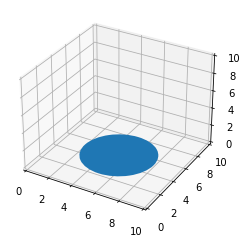